In [23]:
import numpy as np
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2
from math import inf
import matplotlib.pyplot as plt

In [24]:
width = 1024
height = 1024
channels = 3
fps = 30

In [51]:
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video = cv2.VideoWriter('video.avi', fourcc, float(fps), (width, height))
image_name_base = '../build/test'
illegal_frames = [2, 16, 25, 37, 39, 52, 55]
for i in range(60):
    if i not in illegal_frames:
        image_name = image_name_base + str(i) + '_denoised.exr'
        img = cv2.imread(image_name, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
        # img = np.clip(img, 0, 1)
        # img[img == -inf] = 0
        # img[img == inf] = 1
        # img *= 255
        # img = np.uint8(img)
        tonemapDrago = cv2.createTonemapDrago(2.2)
        ldrDurand = tonemapDrago.process(img)
        im2_8bit = np.clip(ldrDurand * 255, 0, 255).astype('uint8')
        video.write(im2_8bit)
        # plt.imshow(img)

In [52]:
video.release()

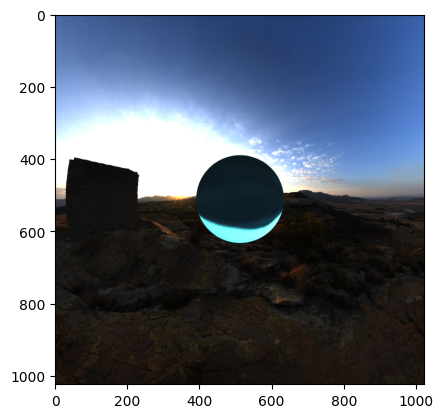

In [30]:
img = cv2.imread('../build/test0_denoised.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.clip(img, 0, 1)
plt.imshow(img)